In [429]:
# solucion del sistema masa resorte amortiguador con metodos numericos
# importar librerias

import numpy as np
import matplotlib.pyplot as plt

# wn  Z
wn = 2 * np.pi * 10
Z = 0

# constantes del sistema
m = 2.5
k = wn**2*m
c = 2*Z*wn*m


# discretiazacion del tiempo
p1 = -c/(2*m)+(1*pow(c/(2*m),2)-k/m)**0.5
p2 = -c/(2*m)-(1*pow(c/(2*m),2)-k/m)**0.5

print(p1,p2)
print(wn)



(3.84734138744358e-15+62.83185307179586j) (-3.84734138744358e-15-62.83185307179586j)
62.83185307179586


In [430]:
tau1=1/np.real(p1)
print(tau1) 
tau2 = 1/np.real(p2)
print(tau2)
if np.imag(p1) != 0:
    Td1=1/(np.imag(p1)/2/np.pi)
    print(Td1) 
    Td2 = 1/(np.imag(p2)/2/np.pi)
    print(Td1)

259919746987793.06
-259919746987793.06
0.1
0.1


In [431]:
# paso de tiempo
h = 1e-3 / 20;
tfin = 0.06*5

n = int (tfin/h + 1 )# cantidad de datos de la simulacion

# Variables de la simulacion t y y1 y y2
t = np.zeros(n)
y1 = np.zeros(n)
y2 = np.zeros(n)

In [432]:
# Funciones a dy1 = f1(t,y1,y2) y dy2 = f2(t,y1,y2)
def f1(t,y1,y2):
    return y2
def f2(t,y1,y2):
    F = 50*np.cos(2*np.pi*50*t)
    sal = -k/m*y1 - c/m * y2 + 1/m*F
    return sal

In [433]:
f2(0,0,0)

20.0

In [434]:

# programa de euler
# condiciones iniciales
y1[0] = 0.5
y2[0] = 0
if 0:
    for i in np.arange(1,n):
        y1[i] = y1[i-1] + h * f1(t[i-1],y1[i-1],y2[i-1])
        y2[i] = y2[i-1] + h * f2(t[i-1],y1[i-1],y2[i-1])
        t[i] = t[i-1] + h

In [435]:
#plt.plot(t,y1)

In [436]:
#.plot(t,y2)

In [437]:
# RK4

t_rk = np.zeros(n)
y1_rk = np.zeros(n)
y2_rk = np.zeros(n)

# condiciones iniciales
y1_rk[0] = 0.
y2_rk[0] = 0


# iteraciones RK
for i in np.arange(1,n):
    k11 = f1(t_rk[i-1],y1_rk[i-1],y2_rk[i-1])
    k12 = f2(t_rk[i-1],y1_rk[i-1],y2_rk[i-1])
    ttemp = t_rk[i-1] + 1/2*h
    y1temp = y1_rk[i-1] + 1/2*h*k11
    y2temp = y2_rk[i-1] + 1/2*h*k12
    k21 = f1(ttemp,y1temp,y2temp)
    k22 = f2(ttemp,y1temp,y2temp)
    
    ttemp = t_rk[i-1] + 1/2*h
    y1temp = y1_rk[i-1] + 1/2*h*k21
    y2temp = y2_rk[i-1] + 1/2*h*k22
    k31 = f1(ttemp,y1temp,y2temp)
    k32 = f2(ttemp,y1temp,y2temp)

    ttemp = t_rk[i-1] + h
    y1temp = y1_rk[i-1] + h*k31
    y2temp = y2_rk[i-1] + h*k32
    k41 = f1(ttemp,y1temp,y2temp)
    k42 = f2(ttemp,y1temp,y2temp)

    t_rk[i] = t_rk[i-1] + h
    y1_rk[i] = y1_rk[i-1] + h * 1/6 * (k11 + 2*k21 + 2*k31 + k41)
    y2_rk[i] = y2_rk[i-1] + h * 1/6 * (k12 + 2*k22 + 2*k32 + k42)

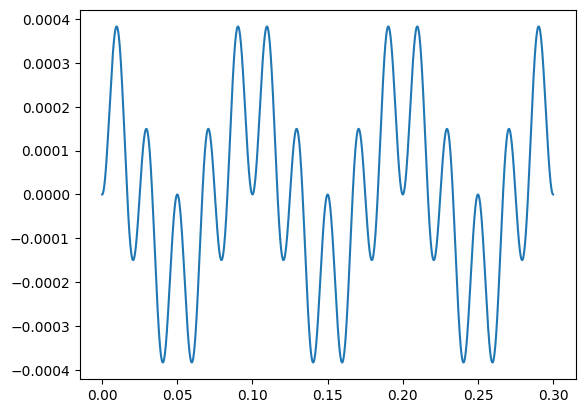

In [438]:
plt.plot(t_rk,y1_rk)
#plt.legend(["Euler","RK4"])

In [439]:
A = np.array([[0,1],[-k/m,-c/m]])
A

array([[ 0.00000000e+00,  1.00000000e+00],
       [-3.94784176e+03, -0.00000000e+00]])

In [440]:
import scipy.linalg 
scipy.linalg.eig(A)

(array([ 0.+62.83185307j, -0.-62.83185307j]),
 array([[0.        -0.01591348j, 0.        +0.01591348j],
        [0.99987337+0.j        , 0.99987337-0.j        ]]))